In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
citydata = pd.read_csv("../Pyber/city_data.csv")
citydata

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [3]:
ridedata = pd.read_csv("../Pyber/ride_data.csv")
ridedata

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [4]:
unique = len(citydata["city"].unique())
unique

125

In [5]:
citygroups = citydata.groupby("city")
citydata.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
combined = pd.merge(citydata, ridedata, on='city')
combined.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
#average driver per city
urbancitydriver = combined.groupby(["city"]).mean()["driver_count"]
urbancitydriver

city
Alvarezhaven            21.0
Alyssaberg              67.0
Anitamouth              16.0
Antoniomouth            21.0
Aprilchester            49.0
Arnoldview              41.0
Campbellport            26.0
Carrollbury              4.0
Carrollfort             55.0
Clarkstad               21.0
Conwaymouth             18.0
Davidtown               73.0
Davistown               25.0
East Cherylfurt          9.0
East Douglas            12.0
East Erin               43.0
East Jenniferchester    22.0
East Leslie              9.0
East Stephen             6.0
East Troybury            3.0
Edwardsbury             11.0
Erikport                 3.0
Eriktown                15.0
Floresberg               7.0
Fosterside              69.0
Hernandezshire          10.0
Horneland                8.0
Jacksonfort              6.0
Jacobfort               52.0
Jasonfort               25.0
                        ... 
South Roy               35.0
South Shannonborough     9.0
Spencertown             68.0
Stevenspo

In [8]:
#average fare per city
averagefare = combined.groupby(["city"]).mean()["fare"]
averagefare

city
Alvarezhaven            23.928710
Alyssaberg              20.609615
Anitamouth              37.315556
Antoniomouth            23.625000
Aprilchester            21.981579
Arnoldview              25.106452
Campbellport            33.711333
Carrollbury             36.606000
Carrollfort             25.395517
Clarkstad               31.051667
Conwaymouth             34.591818
Davidtown               22.978095
Davistown               21.497200
East Cherylfurt         31.416154
East Douglas            26.169091
East Erin               24.478214
East Jenniferchester    32.599474
East Leslie             33.660909
East Stephen            39.053000
East Troybury           33.244286
Edwardsbury             26.876667
Erikport                30.043750
Eriktown                25.478947
Floresberg              32.310000
Fosterside              23.034583
Hernandezshire          32.002222
Horneland               21.482500
Jacksonfort             32.006667
Jacobfort               24.779355
Jasonfort

In [9]:
#total rides per city
totalridespercity = combined.groupby(["city"]).count()["ride_id"]
totalridespercity

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [10]:
urbancity = combined[combined["type"]=="Urban"]
urbancity

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
5,Kelseyland,63,Urban,2016-10-24 15:15:46,33.56,4797969661996
6,Kelseyland,63,Urban,2016-06-06 13:54:23,20.81,9811478565448
7,Kelseyland,63,Urban,2016-08-10 07:02:40,44.53,1563171128434
8,Kelseyland,63,Urban,2016-07-05 17:37:13,29.02,6897992353955
9,Kelseyland,63,Urban,2016-04-25 02:18:31,20.05,1148374505062


In [11]:
suburbancity = combined[combined["type"]=="Suburban"]
suburbancity

,city,driver_count,type,date,fare,ride_id
1625,Carrollbury,4,Suburban,2016-05-09 03:12:10,25.00,485795568537
1626,Carrollbury,4,Suburban,2016-06-09 05:04:24,49.47,617204620844
1627,Carrollbury,4,Suburban,2016-05-20 06:12:36,35.33,73368831241
1628,Carrollbury,4,Suburban,2016-03-21 17:31:26,20.26,7948046018548
1629,Carrollbury,4,Suburban,2016-08-20 11:20:51,46.67,4786094151694
1630,Carrollbury,4,Suburban,2016-09-20 11:00:55,44.22,6459562305940
1631,Carrollbury,4,Suburban,2016-10-27 00:24:55,34.90,8699745721565
1632,Carrollbury,4,Suburban,2016-05-24 03:40:10,47.88,1288226293003
1633,Carrollbury,4,Suburban,2016-03-20 00:10:38,24.36,7992828891256
1634,Carrollbury,4,Suburban,2016-11-20 14:55:02,37.97,4395282429585


In [12]:
ruralcity = combined[combined["type"]=="Rural"]
ruralcity

,city,driver_count,type,date,fare,ride_id
2282,South Elizabethmouth,3,Rural,2016-04-03 11:13:07,22.79,8193837300497
2283,South Elizabethmouth,3,Rural,2016-03-11 12:27:01,26.72,4943246873754
2284,South Elizabethmouth,3,Rural,2016-11-23 07:47:18,46.39,1939838068038
2285,South Elizabethmouth,3,Rural,2016-07-19 09:35:59,31.09,2959749591417
2286,South Elizabethmouth,3,Rural,2016-04-21 10:20:09,16.50,5702608059064
2287,East Troybury,3,Rural,2016-02-21 06:07:18,45.12,1607319707836
2288,East Troybury,3,Rural,2016-03-04 10:49:25,35.77,9725377510815
2289,East Troybury,3,Rural,2016-01-06 13:25:48,59.53,5277708038641
2290,East Troybury,3,Rural,2016-02-29 07:26:19,14.01,6867080292206
2291,East Troybury,3,Rural,2016-07-01 12:48:05,12.88,5989452220219


In [13]:
urbanridecount = urbancity.groupby(["city"]).count()["ride_id"]
urbanridecount
urbancitydriver = urbancity.groupby(["city"]).mean()["driver_count"]
urbancitydriver
urbanaveragefare = urbancity.groupby(["city"]).mean()["fare"]
urbanaveragefare

city
Alvarezhaven         23.928710
Alyssaberg           20.609615
Antoniomouth         23.625000
Aprilchester         21.981579
Arnoldview           25.106452
Carrollfort          25.395517
Davidtown            22.978095
Davistown            21.497200
East Douglas         26.169091
East Erin            24.478214
Edwardsbury          26.876667
Eriktown             25.478947
Fosterside           23.034583
Jacobfort            24.779355
Kellershire          24.169474
Kelseyland           21.806429
Kimberlychester      22.947037
Lake Jeffreyland     27.334800
Lake Jennaton        25.349600
Lake Sarashire       26.610000
Lake Stevenbury      24.657619
Lisatown             22.225217
Lisaville            28.428929
Maryside             26.844286
Mooreview            29.520476
New Aaron            26.861818
New Andreamouth      24.966786
New Christine        24.157727
New David            27.084286
New Jeffrey          24.130000
                       ...    
Port Martinberg      22.329524
Por

In [14]:
suburbanridecount = suburbancity.groupby(["city"]).count()["ride_id"]
suburbanridecount
suburbancitydriver = suburbancity.groupby(["city"]).mean()["driver_count"]
suburbancitydriver
suburbanaveragefare = suburbancity.groupby(["city"]).mean()["fare"]
suburbanaveragefare

city
Anitamouth              37.315556
Campbellport            33.711333
Carrollbury             36.606000
Clarkstad               31.051667
Conwaymouth             34.591818
East Cherylfurt         31.416154
East Jenniferchester    32.599474
Floresberg              32.310000
Jasonfort               27.831667
Jeffreyton              33.165556
Johnland                28.752778
Kyleton                 31.167500
Lake Brenda             29.791176
Martinmouth             30.498889
New Brandonborough      31.902857
New Cindyborough        31.034615
New Jessicamouth        32.810588
New Lynn                28.454615
New Michelleberg        24.971818
New Samanthaside        34.069130
North Tara              32.386667
North Tracyfort         26.856000
Paulfort                31.144615
Port Alexandria         26.316667
Port Guytown            28.242000
Port James              31.806562
Port Jose               31.193889
Port Michelleview       26.720000
Rodriguezview           31.866500
Sarahview

In [15]:
ruralridecount = ruralcity.groupby(["city"]).count()["ride_id"]
ruralridecount
ruralcitydriver = ruralcity.groupby(["city"]).mean()["driver_count"]
ruralcitydriver
ruralaveragefare = ruralcity.groupby(["city"]).mean()["fare"]
ruralaveragefare

city
East Leslie             33.660909
East Stephen            39.053000
East Troybury           33.244286
Erikport                30.043750
Hernandezshire          32.002222
Horneland               21.482500
Jacksonfort             32.006667
Kennethburgh            36.928000
Kinghaven               34.980000
Manuelchester           49.620000
Matthewside             43.532500
New Johnbury            35.042500
North Whitney           38.146000
Shelbyhaven             34.828333
South Elizabethmouth    28.698000
South Joseph            38.983333
Stevensport             31.948000
West Kevintown          21.528571
Name: fare, dtype: float64

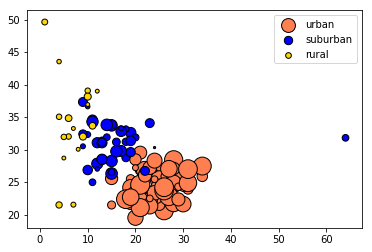

In [16]:
plt.scatter(urbanridecount, urbanaveragefare, s=5*urbancitydriver, c="coral", marker = "o", edgecolor = "black", label = "urban")
plt.scatter(suburbanridecount, suburbanaveragefare, s=5*suburbancitydriver, c="blue", marker = "o", edgecolor = "black", label = "suburban")
plt.scatter(ruralridecount, ruralaveragefare, s=5*ruralcitydriver, c="gold", marker = "o", edgecolor = "black", label = "rural")
plt.legend()
plt.show()

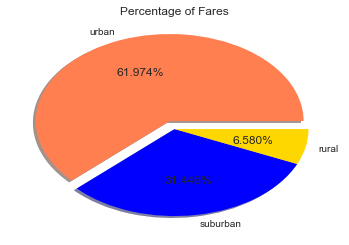

In [34]:
urbanaveragefare=urbancity["fare"].sum()
suburbanaveragefare=suburbancity["fare"].sum()
ruralaveragefare=ruralcity["fare"].sum()

totalaveragefare =[urbanaveragefare,suburbanaveragefare,ruralaveragefare]
explode = [.1,0,0]
labels =["urban","suburban","rural"]
colors = ["coral","blue","gold"]
plt.pie(totalaveragefare,labels=labels,colors=colors,explode=explode, autopct='%1.3f%%', shadow=True)
plt.title("Percentage of Fares")
sns.set()
plt.show()

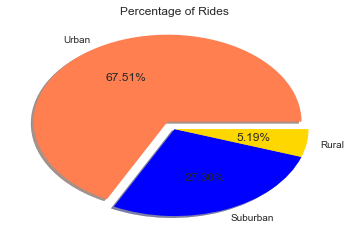

In [39]:

urbanrides = urbancity["ride_id"].count()
suburbanrides = suburbancity["ride_id"].count()
ruralrides = ruralcity['ride_id'].count()

totalrides=[urbanrides,suburbanrides,ruralrides]


labels =["Urban","Suburban","Rural"]
colors = ["coral","blue","gold"]

plt.pie(totalrides,labels=labels,colors=colors,autopct='%1.2f%%',explode=explode,shadow=True)
plt.title("Percentage of Rides")
sns.set()
plt.show()

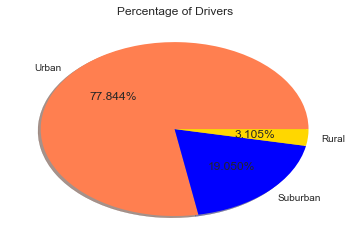

In [43]:
urbandrive = citydata[(citydata["type"]=="Urban")]
urbandrive = urbandrive["driver_count"].sum()
suburbandrive = citydata[(citydata["type"]=="Suburban")]
suburbandrive = suburbandrive["driver_count"].sum()
ruraldrive = citydata[(citydata["type"]=="Rural")]
ruraldrive = ruraldrive["driver_count"].sum()

totaldrive = [urbandrive,suburbandrive,ruraldrive]
labels =["Urban","Suburban","Rural"]
colors = ["coral","blue","gold"]

plt.pie(totaldrive,labels=labels,colors=colors,autopct='%1.3f%%',shadow=True)
plt.title("Percentage of Drivers")
sns.set()
plt.show()